<a href="https://colab.research.google.com/github/CaptainVivi/BTS-Songs-Analysis-/blob/main/BTS_Lyrics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bts-lyrics:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F795088%2F2367806%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240922%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240922T101933Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D585087b99b121e7cf5b481f62b601b37154b19714f45caed7ac239003aed8d8f32c98ae47c41fce72dc1304cd01328003ce944cc3a1c57363eea3b97b46d4126ae31b26116b742f958ab4d92a5d38abb75be182215481b5e76884132cc233450ff6b1009687011b72e1326877e751358c479f75b61ce2c1bf69be1f3a3b96b4d638d3bb2e33abea099de67e87b0e9ab3881a283d8293f494d96f5edb94d5347417ceae55972948c4a47390e40ba83cec8a08b762ef944b5796ef563f36f9aede766888981c9f6d12c77f73fbff09c2473e48c6173ac31f8120fcc8ac0c90958d0ef9400acd4f11addadefe2f6ea4f67a898caedaac4e25eec097166386b7988c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 151667 bytes downloaded
Downloaded and uncompressed: bts-lyrics
Data source import complete.


In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/bts-lyrics/lyrics-v5.csv


In [3]:
# reading csv file
input_path = "../input/bts-lyrics/lyrics-v5.csv"
discogrph = pd.read_csv(input_path)

discogrph.head()

id     album_title eng_album_title    album_rd  album_seq  \
0   0  2 Cool 4 Skool  2 Cool 4 Skool  2013-06-12          1   
1   1  2 Cool 4 Skool  2 Cool 4 Skool  2013-06-12          2   
2   2  2 Cool 4 Skool  2 Cool 4 Skool  2013-06-12          3   
3   3  2 Cool 4 Skool  2 Cool 4 Skool  2013-06-12          4   
4   4  2 Cool 4 Skool  2 Cool 4 Skool  2013-06-12          5   

                           track_title kor_track_title  \
0  Intro: 2 Cool 4 Skool (ft. DJ Friz)             NaN   
1             We Are Bulletproof Pt.2              NaN   
2              Skit: Circle Room Talk              NaN   
3                       No More Dream              NaN   
4                            Interlude             NaN   

                       eng_track_title  \
0  Intro: 2 Cool 4 Skool (ft. DJ Friz)   
1              We Are Bulletproof Pt.2   
2               Skit: Circle Room Talk   
3                        No More Dream   
4                            Interlude   

                                              lyrics  hidden_track  remix  \
0  we’re now going to progress to some steps\nwhi...         False  False   
1  (what) give it to me\n (what) be nervous\n (wh...         False  False   
2  rap monster: it was a big hit\nv: year 2006!\n...         False  False   
3  hey, what's your dream?\n hey, what’s your dre...         False  False   
4                                                NaN         False  False   

  featured performed_by  repackaged lang  has_full_ver  
0  DJ Friz           RM       False  KOR         False  
1      NaN          BTS       False  KOR         False  
2      NaN          BTS       False  KOR         False  
3      NaN          BTS       False  KOR         False  
4      NaN          BTS       False  NaN         False

In [4]:
# Splitting the date into three separate columns
discogrph[['released_year','released_month','released_date']] = discogrph['album_rd'].str.split('-',expand=True).apply(pd.to_numeric)

In [8]:
# removing trailing spaces in text feature columns
discogrph['eng_track_title'] = discogrph['eng_track_title'].str.rstrip()
discogrph['akbum_title'] = discogrph['album_title'].str.rstrip()
discogrph['eng_album_title'] = discogrph['eng_album_title'].str.rstrip()
discogrph['track_title'] = discogrph['track_title'].str.rstrip()
discogrph['kor_track_title'] = discogrph['kor_track_title'].str.rstrip()
discogrph['lyrics'] = discogrph['lyrics'].str.rstrip()

In [9]:
# installing RAKE for keyword extracting
import sys
!{sys.executable} -m pip install nlp_rake

In [7]:
# importing libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Number of songs in each album (only what is included in the dataset)

In [10]:
n_songs =discogrph['eng_album_title'].value_counts()
n_songs

eng_album_title
Love Yourself: Answer                               27
The Most Beautiful Moment In Life: Young Forever    23
MAP OF THE SOUL: 7                                  21
You Never Walk Alone                                18
WINGS                                               15
Dark and Wild                                       14
Skool Luv Affair (Special Addition)                 12
Love Yourself: Tear                                 11
Love Yourself: Her                                  11
Skool Luv Affair                                    10
O!RUL8,2?                                           10
2 Cool 4 Skool                                       9
The Most Beautiful Moment In Life Pt.2               9
The Most Beautiful Moment In Life Pt.1               9
BE                                                   8
MAP OF THE SOUL: PERSONA                             7
Dynamite (DayTime Version)                           6
Dynamite (NightTime Version)                         6
Name: count, dtype: int64

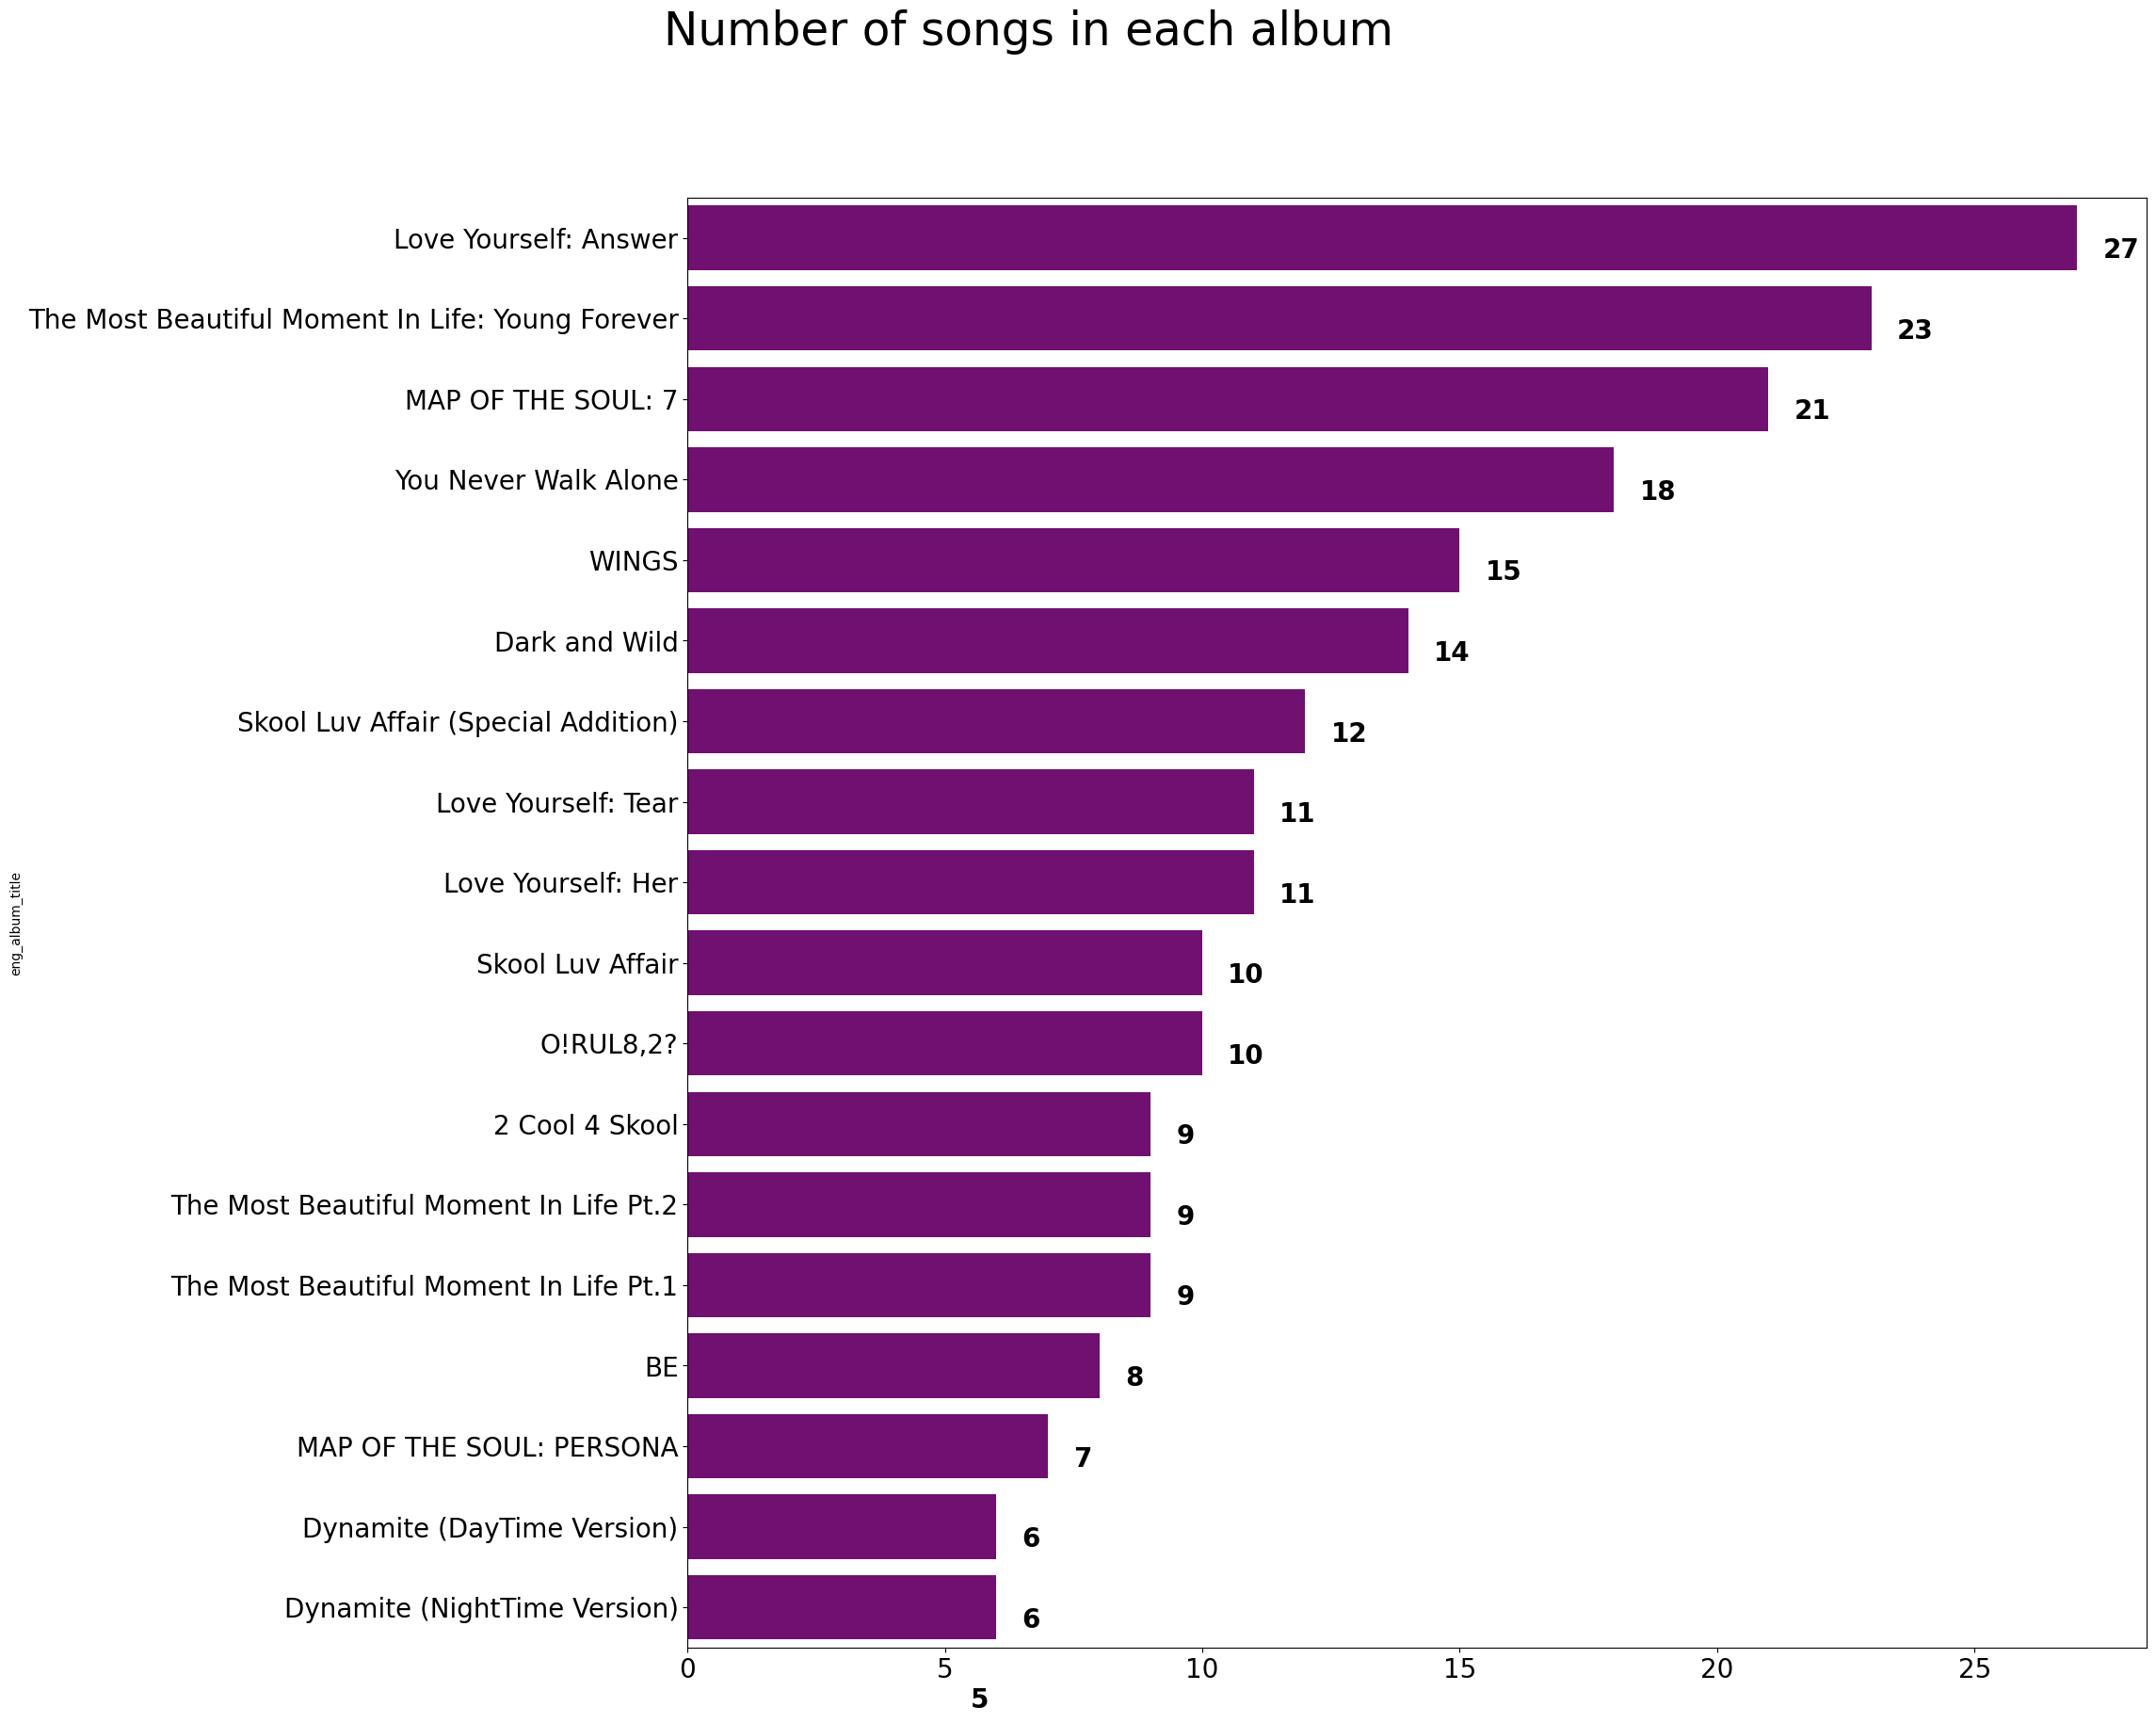

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle("Number of songs in each album",fontsize= 35, ha = 'right')
plt.xticks(fontsize= 20)
plt.yticks(fontsize = 20)
plot = sns.barplot(y=n_songs.index,x=n_songs.values, color = 'purple');
for i, v in enumerate(discogrph['album_title'].value_counts()):
    ax.text(v+0.5, i+0.25, str(v), color='black', fontweight='bold',size = 20)

## Remix Analysis

In [12]:
# number of remixes included in the dataset
n_remix = sum(discogrph['remix'])
print('Number of remixes:',n_remix)
print('Remixed songs:',discogrph['eng_track_title'][discogrph['remix'] == True].values,sep = '\n')

Number of remixes: 20
Remixed songs:
['I Like It (Slow Jam Remix)' 'Butterfly (Prologue Mix)'
 'I NEED U (Urban Mix)' 'I NEED U (Remix)' 'Run (Ballad Mix)'
 'Run (Alternative Mix)' 'Butterfly (Alternative Mix)'
 'DNA (Pedal 2 LA Mix)' 'FAKE LOVE (Rocking Vibe Mix)'
 'MIC Drop (Steve Aoki Remix)' 'IDOL (Remix) ft. Nicki Minaj'
 'ON (Remix) ft. Sia' 'Dynamite (Acoustic Remix)' 'Dynamite (EDM Remix)'
 'Dynamite (Tropical Remix)' 'Dynamite (Poolside Remix)'
 'Dynamite (Slow Jam Remix)' 'Dynamite (Midnight Remix)'
 'Dynamite (Retro Remix)' 'Dynamite (Bedroom Remix)']


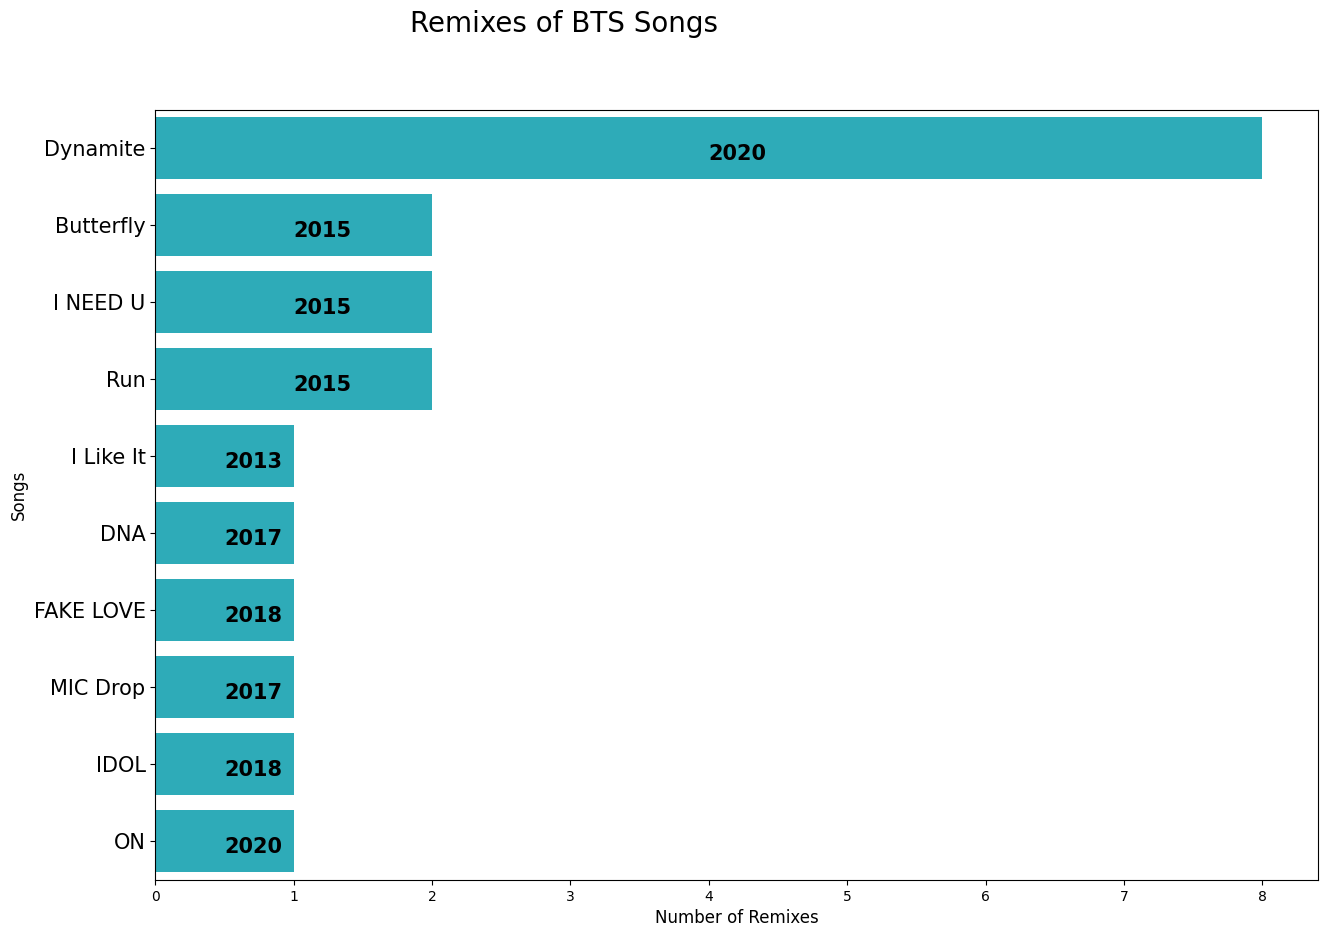

In [13]:
remixes = list(discogrph['eng_track_title'][discogrph['remix'] == True])
remixes = pd.Series([remixes[i].split('(')[0].rstrip() for i in range(len(remixes))]).value_counts()

fig, ax = plt.subplots(figsize = (15,10))
fig.suptitle("Remixes of BTS Songs",ha = 'right',fontsize = 20)
plt.xlabel("Number of Remixes",fontsize = 12)
plt.ylabel("Songs",fontsize= 12)
plt.yticks(fontsize=15)

x_values, y_values =remixes.values, remixes.index
sns.barplot(x = x_values, y = y_values, color = 'tab:cyan')

for i,v in enumerate(x_values):
    ax.text(v/2,i+0.15,str(discogrph['released_year'][discogrph['eng_track_title'].str.lower()==y_values[i].lower()].values[0]),fontsize=15,
            fontweight= 'bold',color= 'black')


## Hidden tracks

In [14]:
# number of hidden tracks in BTS Discography
n_hidden = sum(discogrph['hidden_track'])
print(f'Number of hidden tracks in BTS Discography: {n_hidden}')
print('Hidden tracks in BTS Discography:',discogrph.loc[discogrph['hidden_track']==True,['eng_track_title','released_year']].values,sep='\n')

Number of hidden tracks in BTS Discography: 3
Hidden tracks in BTS Discography:
[['Skit: On The Start Line' 2013]
 ['Road/Path' 2013]
 ['Sea' 2017]]


## Distribution of song performers

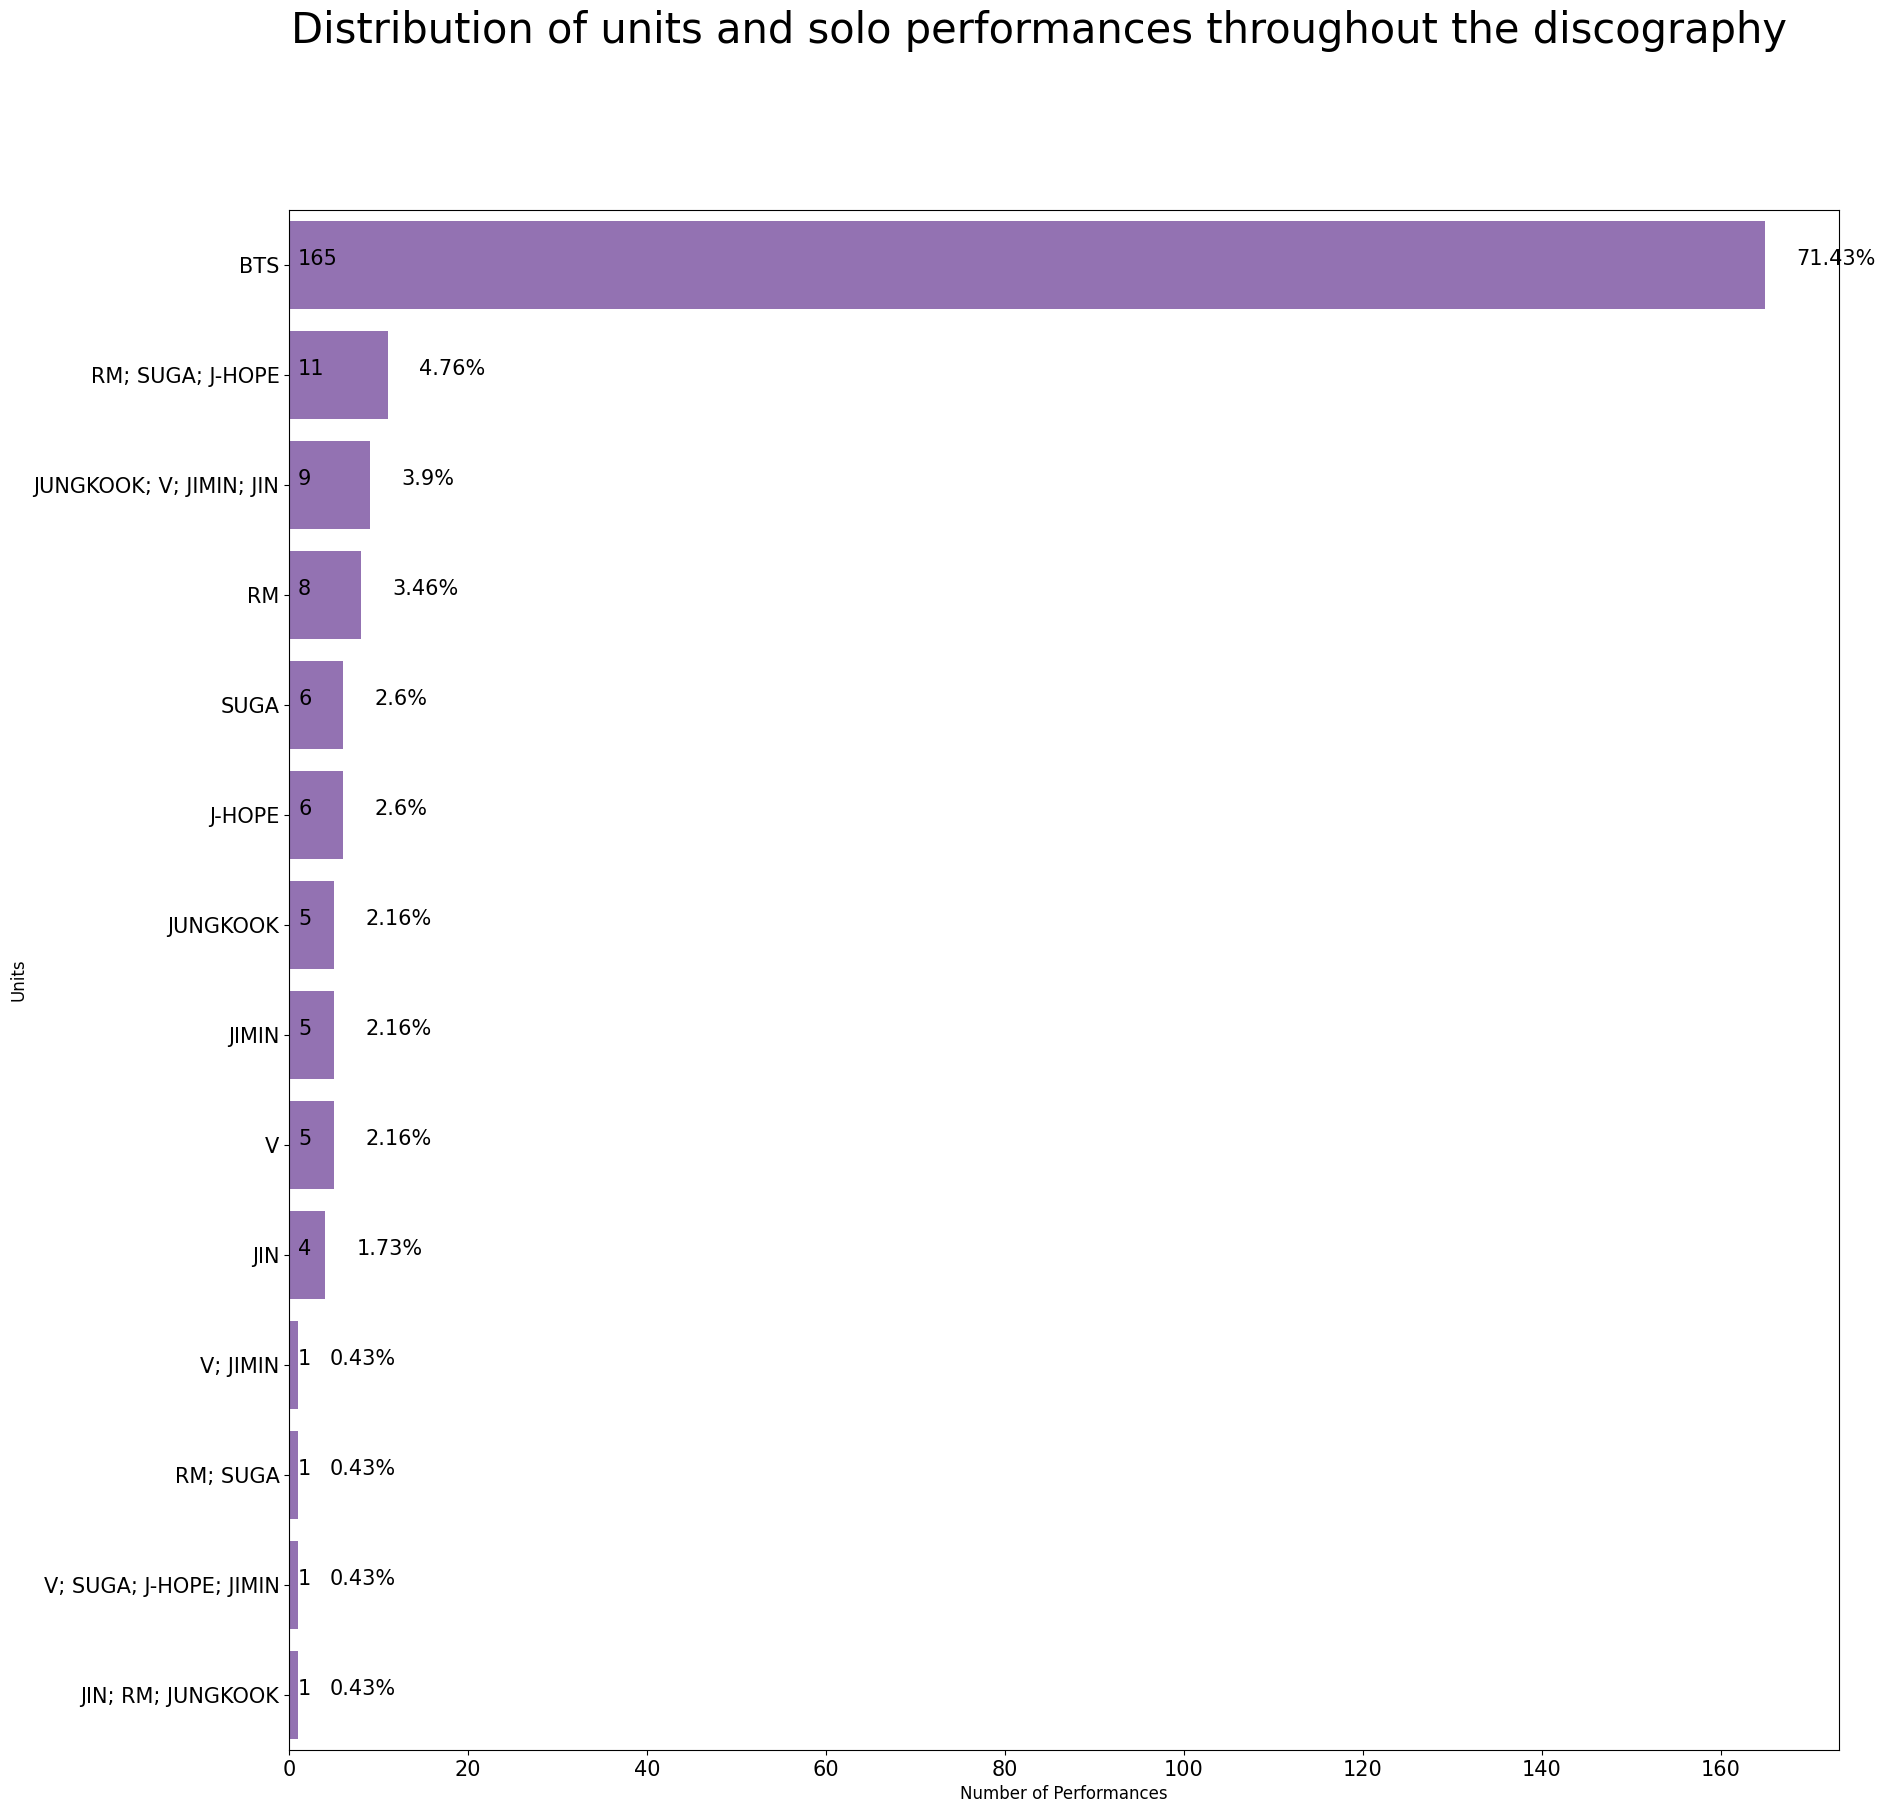

In [15]:
x_axis, y_axis =discogrph['performed_by'].value_counts().index,discogrph['performed_by'].value_counts().values

fig,ax = plt.subplots(figsize = (20,20))
fig.suptitle("Distribution of units and solo performances throughout the discography", ha = 'center',fontsize = 30)
plt.xlabel("Number of Performances",fontsize = 12)
plt.ylabel("Units",fontsize= 12)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

sns.barplot(x = y_axis, y = x_axis, color = 'tab:purple')
for i,v in enumerate(y_axis):
    ax.text(v+3.5,i,str(round((v/len(discogrph))*100,2))+'%',fontsize=15,color= 'black')
    ax.text(1,i,v,fontsize=15,color= 'black')

## Yearly Analysis

**You would think that, with the advent of Corona and social distancing, BTS may have worked less compared to the previous years, but this graph shows us otherwise. Actually, 2020 is the year they have been the busiest in song making.**

In [16]:
n_songs_year = discogrph['released_year'].value_counts().sort_index()

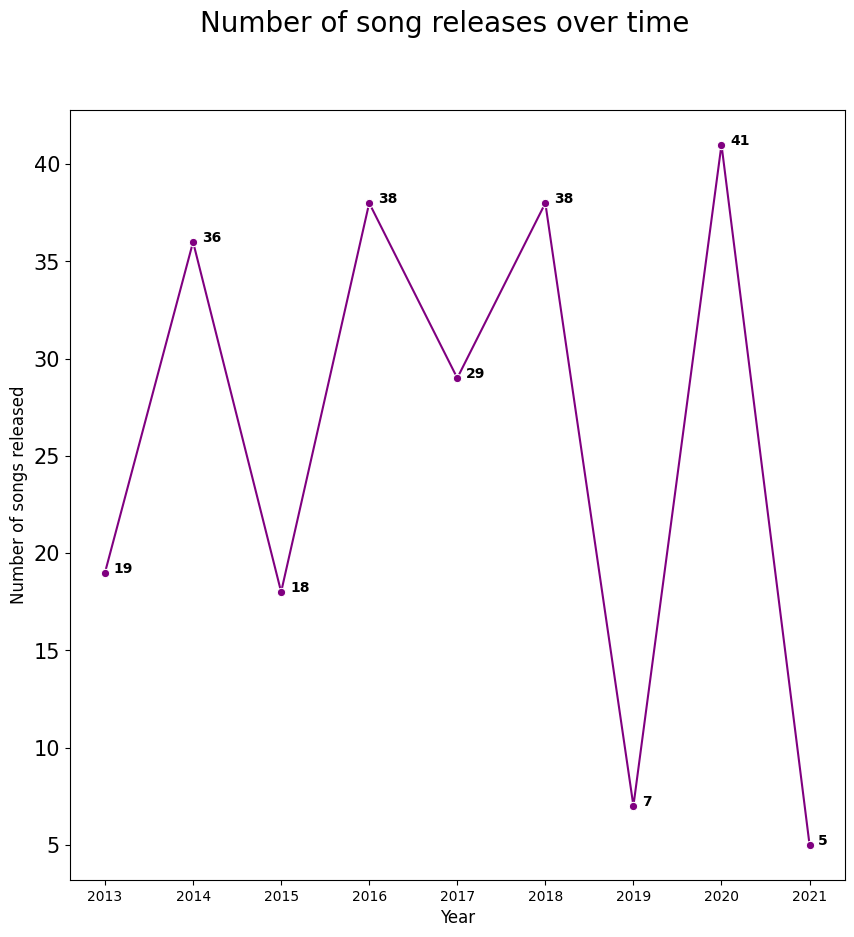

In [17]:
x_values, y_values = n_songs_year.index,n_songs_year.values
fig,ax = plt.subplots(figsize = (10,10))
fig.suptitle("Number of song releases over time", ha = 'center',fontsize = 20)
plt.xlabel("Year",fontsize = 12)
plt.ylabel("Number of songs released",fontsize= 12)
plt.yticks(fontsize=15)
sns.lineplot(x=x_values, y=y_values, color = 'purple', marker='o')

for i,j in zip(x_values,y_values):
    ax.text(i+0.1,j,str(j),color= 'black', fontweight = 'bold')


## Era-wise lyrics analysis

In [18]:
# Eras of BTS Discography
eras = {1:['2 Cool 4 Skool','O!RUL8,2?','Skool Luv Affair','Skool Luv Affair (Special Addition)','Dark and Wild'],
        2:['화양연화 The Most Beautiful Moment In Life Pt.1',
       '화양연화 The Most Beautiful Moment In Life Pt.2',
       '화양연화 The Most Beautiful Moment In Life: Young Forever'],
       3:['Wings','You Never Walk Alone'],
        4:["Love Yourself 承 ‘Her’","LOVE YOURSELF 轉 ‘Tear’", "LOVE YOURSELF 結 ‘Answer’"],
       5:['MAP OF THE SOUL: PERSONA', 'MAP OF THE SOUL: 7'],
       6:['BE']}


### Era 1 - School Trilogy

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import nlp_rake
from spacy.lang.en.stop_words import STOP_WORDS

def era_keyword_displayer (era_num):
    lyr = [discogrph.loc[discogrph['album_title'] == alb,'lyrics'] for alb in eras[era_num]]
    lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()
    text = ''
    for k in lyr.index:
        text += lyr[k]

    extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
    res = extractor.apply(text)
    print(res[:10])

    wc = WordCloud(background_color='white',width=800,height=600)
    plt.figure(figsize=(15,7))
    plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

[('bang bang', 4.0), ('epik high', 4.0), ('hip hop', 4.0), ('hey ya', 4.0), ('good car', 4.0), ('i’m real', 4.0), ('promise ya', 4.0), ('real fact', 4.0), ('i’ll show', 4.0), ('rest stop', 4.0)]


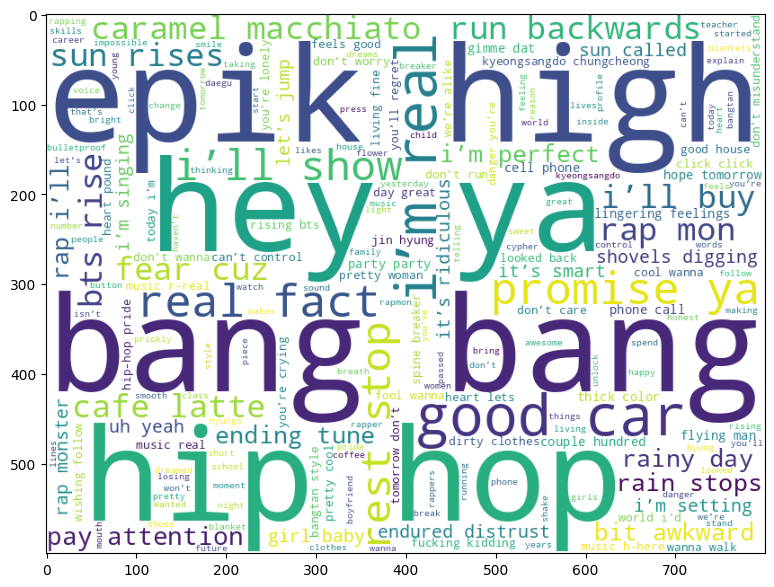

In [20]:
era_keyword_displayer(1)

### Era 2 - Youth Trilogy

[('huh i’m', 4.0), ('i’ll treat', 4.0), ('girl girl', 4.0), ('wasn’t love', 4.0), ('i’m fair', 4.0), ('body burns', 4.0), ('gotta make', 4.0), ('it’s dope', 4.0), ('reject rejection', 4.0), ('hustle life', 4.0)]


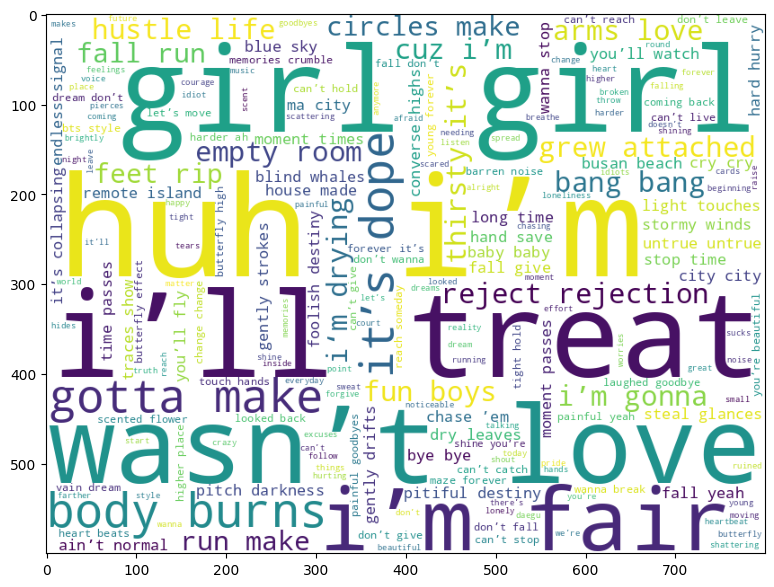

In [21]:
era_keyword_displayer(2)

### Era 3 - Wings

[('lie find', 4.0), ('lie give', 4.0), ('lie pull', 4.0), ('pain save', 4.0), ('gave selflessly', 4.0), ('wide awake', 4.0), ('path lost', 4.0), ('constantly pushing', 4.0), ('exit lost', 4.0), ('ladies put', 4.0)]


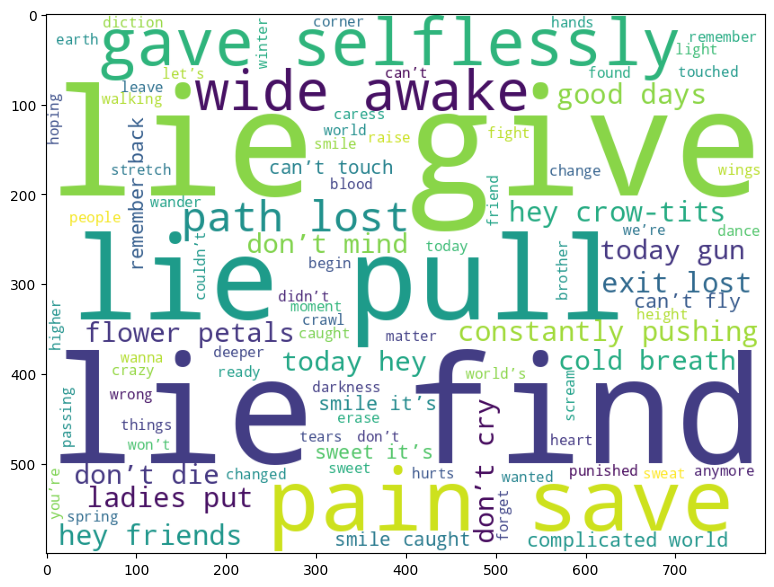

In [22]:
era_keyword_displayer(3)

### Era 4 - Love yourself

[('calico cat', 4.0), ('hand reaching', 4.0), ('infinite centuries', 4.0), ('previous life', 4.0), ('real love', 4.0), ('true lovers', 4.0), ('it’s weird', 4.0), ('call love', 4.0), ('day summer', 4.0), ('illegal ille~gal', 4.0)]


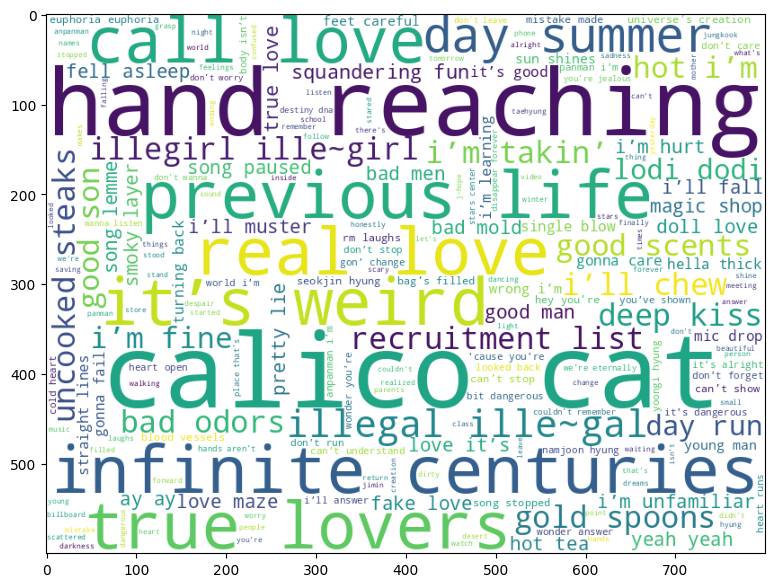

In [23]:
era_keyword_displayer(4)

### Era 5 - Map Of the Soul

[('voices till', 4.0), ('flying high', 4.0), ('eyes yeah', 4.0), ('mi casa', 4.0), ('let’s steal', 4.0), ('fall asleep', 4.0), ('glass ay', 4.0), ('linked arms', 4.0), ('rap star', 4.0), ('call ya', 4.0)]


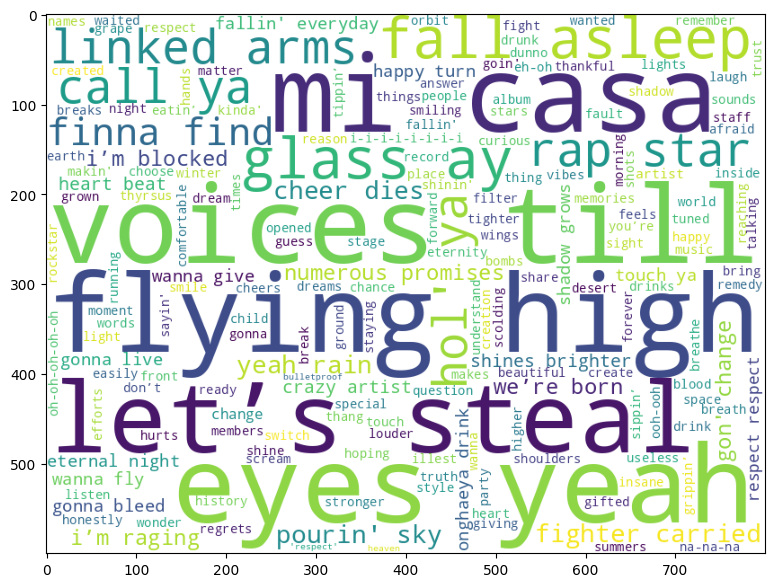

In [24]:
era_keyword_displayer(5)

### Era 6 - BE

[("feelin' brand", 4.0), ('jung kook', 4.0), ('blue sea', 4.0), ('calmly treat', 4.0), ('stay yeah', 4.0), ('ayy dyn-na-na-na', 3.9), ('special person', 3.857142857142857), ('special ayy', 3.857142857142857), ('room lower', 3.833333333333333), ('stars tonight', 3.833333333333333)]


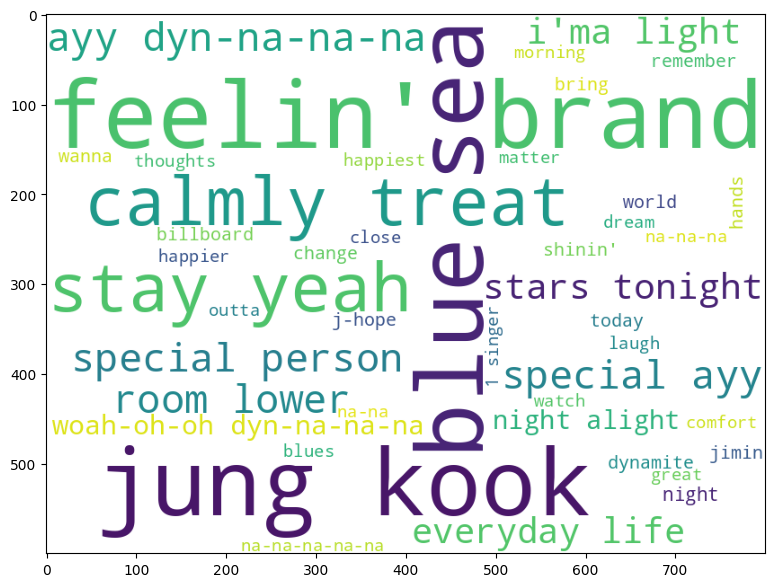

In [25]:
era_keyword_displayer(6)

# Without using RAKE using only wordcloud library
With only wordcloud, it seems to introduce a lot of noice.

In [26]:
def clean(val_list): #method to eliminate additional redundant words
    lst = []
    words = ["don't",'even','will','m','go','let','oh','s','la','yeah','ll','re','na','don','know','na','want','pt','remix','ft','outro','into','interlude','edition','full','length','skit','hey','ya']
    for val in val_list:
        flag = 1
        i = val.lower().strip(":.")
#         i = i.split("’")
#         print(i)
#         for tok in i:
#             if tok not in words:
#                 lst.append(tok)
        if i not in words:
            lst.append(i)

    return lst

In [27]:
def lyric_wordcloud_displayer(era_num):
    lyr = [discogrph.loc[discogrph['album_title'] == alb,'lyrics'] for alb in eras[era_num]]
    lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()

    comment_words = ''
    stopwords = set(STOP_WORDS)

    for val in lyr:
        val = str(val)
        tokens = clean(val.split())
    #     print(tokens)
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 500, height = 700, background_color ='white',
                          stopwords = stopwords, min_font_size = 10,min_word_length = 4,collocation_threshold=20).generate(comment_words)

    # creating a word dictionary
    text_dictionary = wordcloud.process_text(comment_words)
    # sort the dictionary
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
    #use words_ to print relative word frequencies
    rel_freq=wordcloud.words_
    #print results
    print(list(word_freq.items())[:10])
    print(list(rel_freq.items())[:10])

    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()


### Era 1 - School Trilogy

[('like', 176), ('love', 65), ('come', 64), ('right', 62), ('dream', 59), ('bang bang', 56), ('time', 54), ('look', 52), ('girl', 52), ('hope', 49)]
[('like', 1.0), ('love', 0.3693181818181818), ('come', 0.36363636363636365), ('right', 0.3522727272727273), ('dream', 0.3352272727272727), ('bang bang', 0.3181818181818182), ('time', 0.3068181818181818), ('look', 0.29545454545454547), ('girl', 0.29545454545454547), ('hope', 0.2784090909090909)]


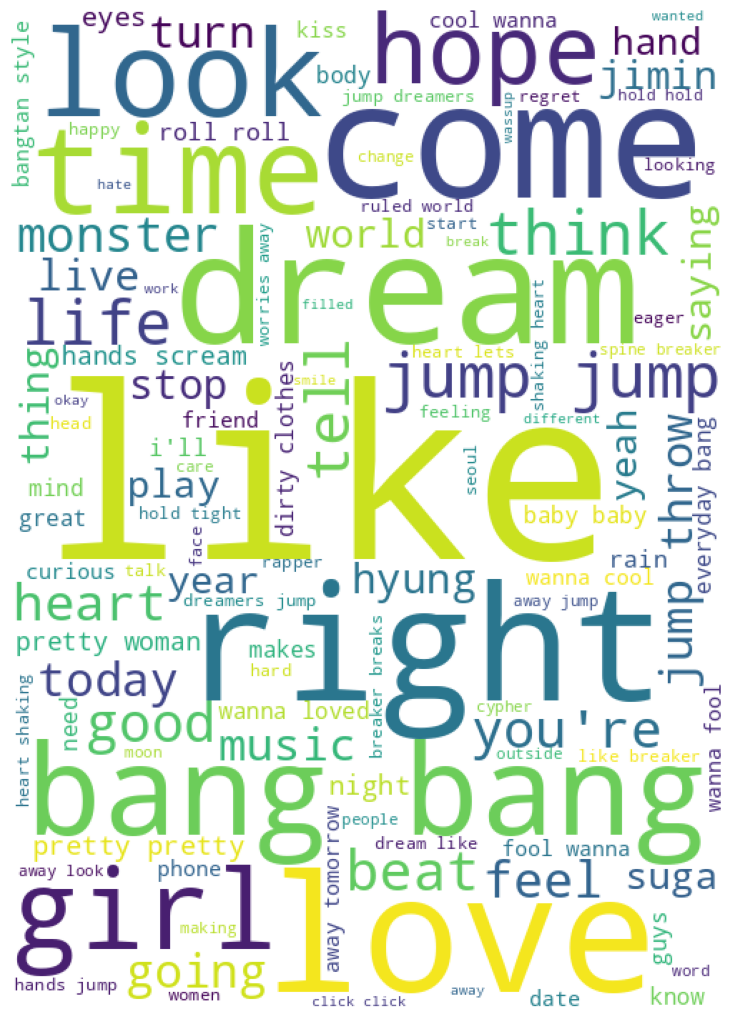

In [28]:
lyric_wordcloud_displayer(1)

### Era 2 - Youth Trilogy

[('like', 124), ('need girl', 96), ('love', 58), ('converse high', 56), ('scared scared', 44), ('thing', 42), ('right', 37), ('girl need', 36), ('stop', 35), ('like butterfly', 35)]
[('like', 1.0), ('need girl', 0.7741935483870968), ('love', 0.46774193548387094), ('converse high', 0.45161290322580644), ('scared scared', 0.3548387096774194), ('thing', 0.3387096774193548), ('right', 0.29838709677419356), ('girl need', 0.2903225806451613), ('stop', 0.28225806451612906), ('like butterfly', 0.28225806451612906)]


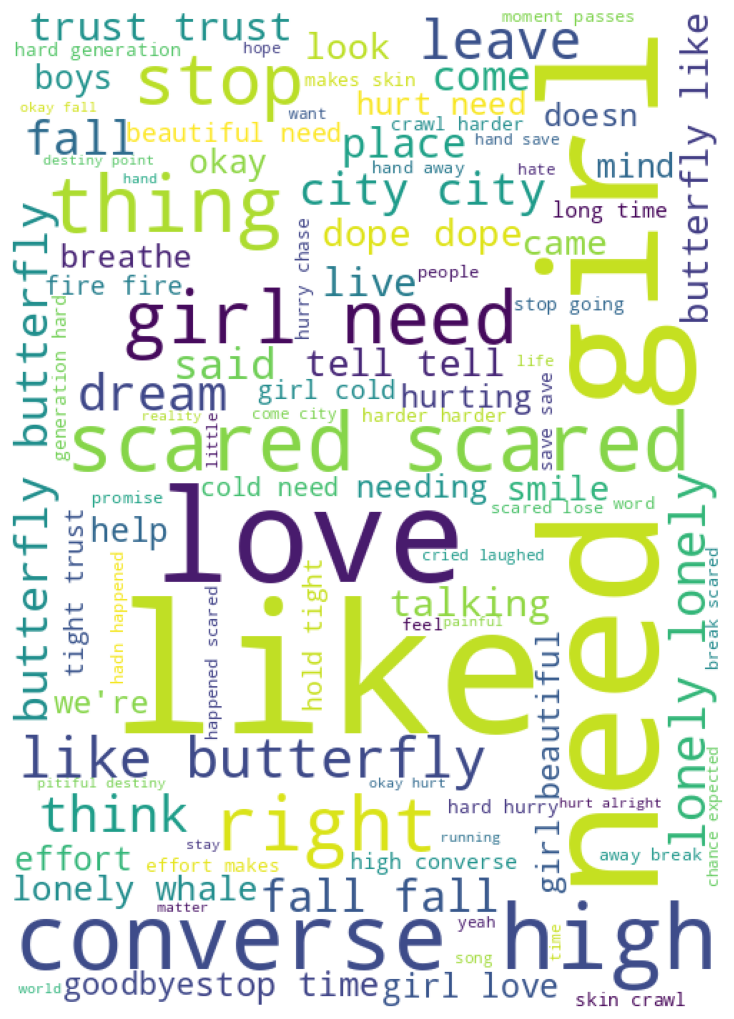

In [29]:
lyric_wordcloud_displayer(2)

### Era 3 - Wings

[('like', 41), ('hand', 37), ('believe', 28), ('smile', 22), ('path', 21), ('wings', 18), ('world', 18), ('walk', 16), ('love love', 16), ('today today', 16)]
[('like', 1.0), ('hand', 0.9024390243902439), ('believe', 0.6829268292682927), ('smile', 0.5365853658536586), ('path', 0.5121951219512195), ('wings', 0.43902439024390244), ('world', 0.43902439024390244), ('walk', 0.3902439024390244), ('love love', 0.3902439024390244), ('today today', 0.3902439024390244)]


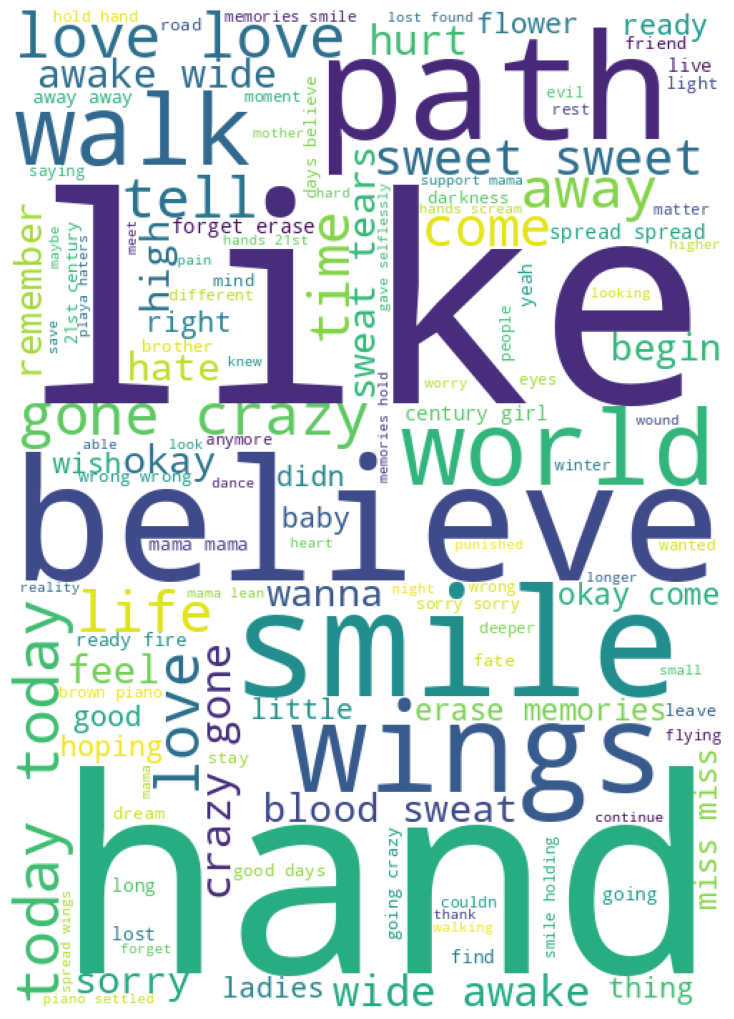

In [30]:
lyric_wordcloud_displayer(3)

### Era 4 - Love yourself

[('like', 104), ('love love', 83), ('fake love', 66), ('time', 61), ('dream', 58), ('didn', 56), ('hope', 53), ('yolo yolo', 48), ('right', 46), ('jimin', 46)]
[('like', 1.0), ('love love', 0.7980769230769231), ('fake love', 0.6346153846153846), ('time', 0.5865384615384616), ('dream', 0.5576923076923077), ('didn', 0.5384615384615384), ('hope', 0.5096153846153846), ('yolo yolo', 0.46153846153846156), ('right', 0.4423076923076923), ('jimin', 0.4423076923076923)]


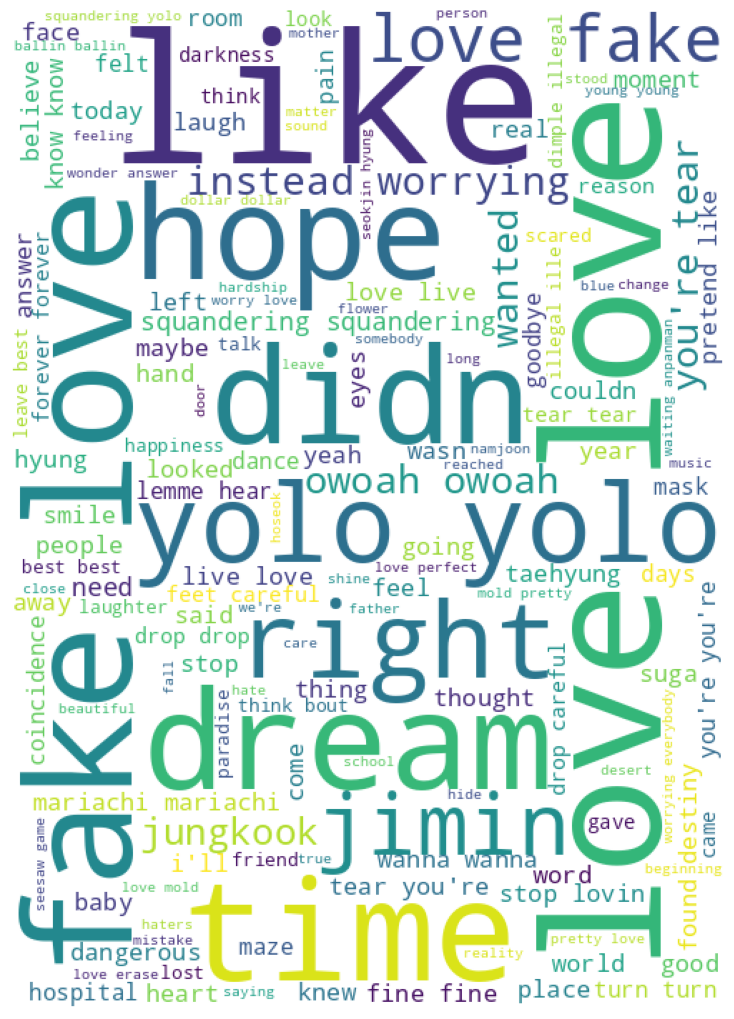

In [31]:
lyric_wordcloud_displayer(4)

### Era 5 - Map Of the Soul

[('like', 59), ('time', 42), ('world', 41), ('drink drink', 40), ('light', 39), ('love', 33), ('come', 30), ('night', 27), ('yeah yeah', 27), ('yeah', 26)]
[('like', 1.0), ('time', 0.711864406779661), ('world', 0.6949152542372882), ('drink drink', 0.6779661016949152), ('light', 0.6610169491525424), ('love', 0.559322033898305), ('come', 0.5084745762711864), ('night', 0.4576271186440678), ('yeah yeah', 0.4576271186440678), ('yeah', 0.4406779661016949)]


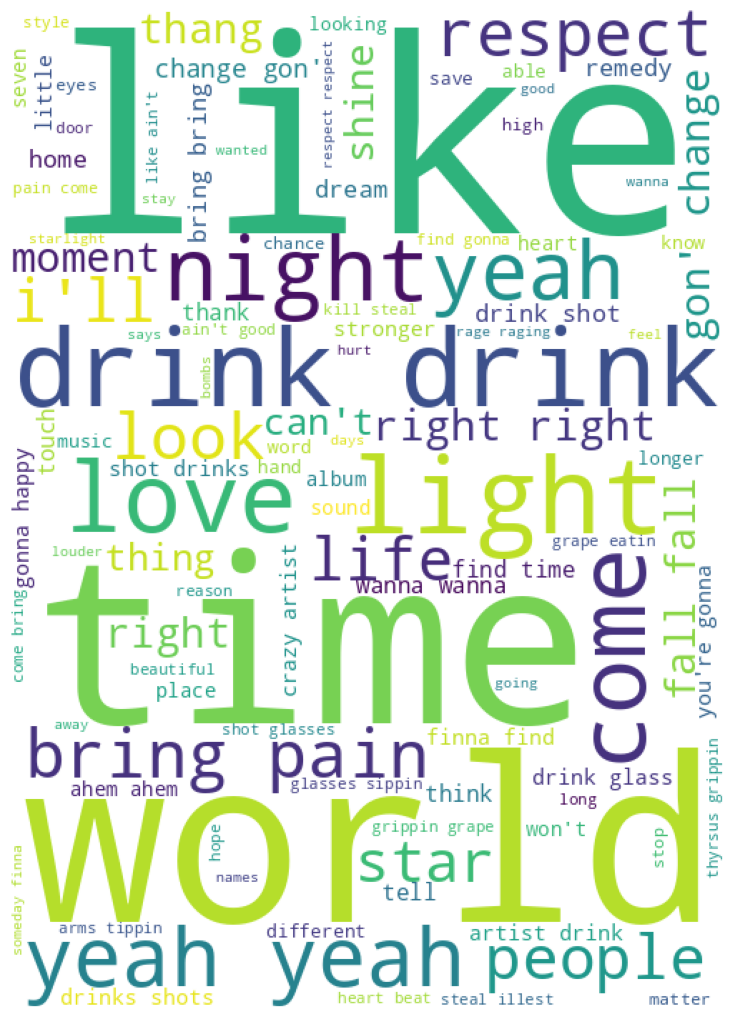

In [32]:
lyric_wordcloud_displayer(5)

### Era 6 - BE

[('like', 18), ('suga', 16), ('today', 14), ('hope', 13), ('feel', 11), ('time', 9), ('disease', 9), ('world', 8), ('song', 8), ('city', 8)]
[('like', 1.0), ('suga', 0.8888888888888888), ('today', 0.7777777777777778), ('hope', 0.7222222222222222), ('feel', 0.6111111111111112), ('time', 0.5), ('disease', 0.5), ('world', 0.4444444444444444), ('song', 0.4444444444444444), ('city', 0.4444444444444444)]


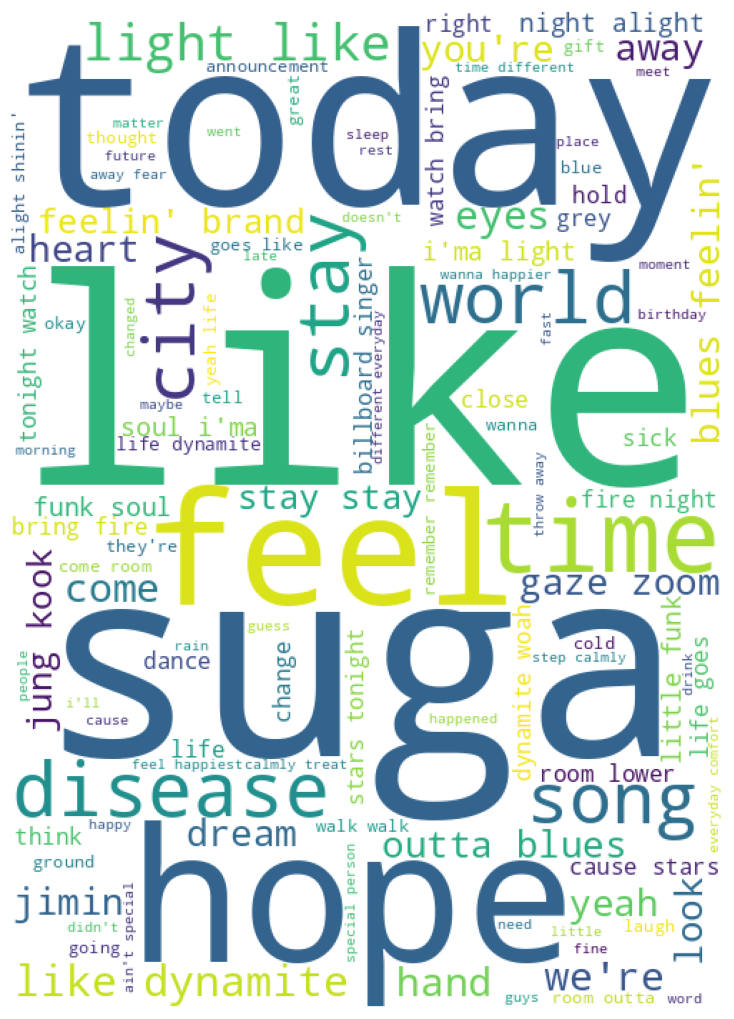

In [33]:
lyric_wordcloud_displayer(6)

In [ ]:
# prompt: Give me the inferences of this analysis

# Inferences from the BTS Lyrics Analysis

# 1. Album Popularity and Song Count:
#    - The analysis reveals the number of songs released in each album, offering insights into the popularity and content of various periods in BTS's career.
#    - Albums with a larger number of songs might indicate a more prolific or experimental phase.

# 2. Remix Analysis:
#    - The analysis explores the prevalence of remixes and identifies songs that were remixed, suggesting the popularity and adaptability of these tracks.

# 3. Hidden Track Analysis:
#    - The examination of hidden tracks provides insights into BTS's creative process and the presence of exclusive content for fans.

# 4. Song Performance Distribution:
#    - The analysis assesses the number of performances by different members or units (e.g., solo, sub-unit), showcasing the collaborative aspects of their music and individual contributions.

# 5. Yearly Analysis:
#    - The analysis reveals the trend of song releases over time, showing potential variations in creativity and productivity across different years.
    # - It suggests that 2020 was a particularly busy and productive year for BTS in terms of creating new songs.

# 6. Era-wise Lyrics Analysis:
#    - The analysis examines keywords and overall word frequency in the lyrics for different eras of BTS's discography.
    # - By looking at the word clouds and keyword lists, we can make some inferences about the central themes, emotional tone and recurring motifs throughout different phases of their career. For example:
    #      - The school trilogy era might show keywords related to youth, school life, and growing up.
    #      - The love yourself era might show keywords relating to love, self-discovery, and personal growth.
    #      - The map of the soul era might show keywords related to introspection, identity, and mental health.

# 7. Wordcloud and RAKE Analysis:
#    - The study using wordclouds and RAKE helps identify the most prominent themes and topics present in the lyrics within different eras, providing a better understanding of their evolving musical expressions.

# Overall:

# - The analysis offers a comprehensive look into BTS's discography, from their early work to their current era.
# - It highlights themes, lyrical patterns, and collaborative aspects of their musical journey.
# - It reveals insights into the band's creativity, their musical preferences, and their growth as artists over time.


# Note: These inferences are based on the provided code and its output. Further analysis and interpretation can uncover deeper meanings and contexts.
